# 𝐌𝐀𝐋𝐀𝐑𝐈𝐀 𝐂𝐄𝐋𝐋 𝐃𝐄𝐓𝐄𝐂𝐓𝐈𝐎𝐍



## OVERVIEW
**Malaria stands as a prominent and pervasive parasitic ailment among humans. Its clinical manifestations emerge when parasites infiltrate and proliferate within human red blood cells.**

**Upon being bitten by a malaria-infected mosquito, the parasite infiltrates the bloodstream, undergoes multiplication within liver cells, and subsequently re-enters the bloodstream. Here, it proceeds to infect and dismantle red blood cells.**

### PARASITIZED  & UNINFECTED CELL
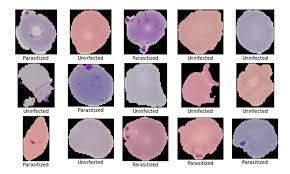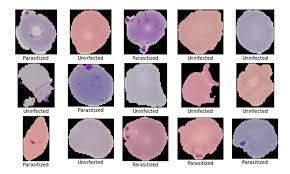

## DATA INFORMATION:
This dataset contains 27560 png images of malaria Parasitized & uninfected cells.The images are grouped into 2 classes. 
There are 13780 images in each class.


**Classes**
1. Parasitized 
2. Uninfected

## TASK: BINARY CLASSIFICATION

## WE DEVICE THIS PROJECT INTO MULTIPLE STEPS
* Importing library
* Make subset of training,testing & validation
* Data Processing [Prepare training and testing data]
* Visualise Training Images
* Build Arcitecture
* Model Compilation
* Training
* Evaluation
* Model saving
* Prediction
* Testing
* Visualise Test Images


### PYTHON IMPLIMENTATION

#### IMPORTING NECESSARY LIBRARY

In [ ]:
import tensorflow as tf
import keras
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
import matplotlib.pyplot as plt
import numpy as np
from glob import glob

# To avoid warnings
import warnings
warnings.filterwarnings('ignore')

### MOUNT GOOGLE DRIVE

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


#### MAKE SUBSET OF TRAINING, TESTING, VALIDATION

In [ ]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import splitfolders
splitfolders.ratio("/content/drive/MyDrive/Malaria-2/cell_images",output='subset',ratio=(0.8,0.1,0.1),seed=1337)

Copying files: 27589 files [11:00, 41.77 files/s] 


#### GENERATE TRAINING AND VALIDATION BATCHES OF IMAGES

In [ ]:
# Get path of training, testing and validation folder
train_dir = "/content/subset/train" 
val_dir   = "/content/subset/val"
test_dir  = "/content/subset/test"

In [ ]:
# Import Dataset with ImageDataGenerator
training_datagen = ImageDataGenerator(rescale=(1./255),
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     fill_mode='nearest',
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True)


val_datagen = ImageDataGenerator(rescale=(1./255))

test_datagen = ImageDataGenerator(rescale=(1./255))




In [ ]:
training_set = training_datagen.flow_from_directory(train_dir,
                                                    target_size=(224,224),
                                                    batch_size=32,
                                                    color_mode='rgb',
                                                    class_mode='binary')

val_set      = val_datagen.flow_from_directory(val_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               color_mode='rgb',
                                               class_mode='binary')

test_set   = test_datagen.flow_from_directory(test_dir, 
                                              target_size=(224,224),
                                              batch_size=32,
                                              color_mode='rgb',
                                              class_mode='binary')

Found 22069 images belonging to 2 classes.
Found 2758 images belonging to 2 classes.
Found 2760 images belonging to 2 classes.


#### VISUALISE THE TRAINING DATA OF BOTH CLASSES

In [ ]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import cv2

parasitized_train_data = os.listdir("/content/subset/train/Parasitized")
print(parasitized_train_data[:10])


uninfected_train_data = os.listdir("/content/subset/train/Uninfected")
print(uninfected_train_data[:10])

['C144P105ThinF_IMG_20151015_155004_cell_310.png', 'C39P4thinF_original_IMG_20150622_105253_cell_92.png', 'C186P147NThinF_IMG_20151203_150408_cell_184.png', 'C46P7ThinF_IMG_20151130_205828_cell_151.png', 'C45P6ThinF_IMG_20151130_155110_cell_207.png', 'C185P146ThinF_IMG_20151203_110344_cell_265.png', 'C48P9thinF_IMG_20150721_161243_cell_153.png', 'C172P133ThinF_IMG_20151119_155156_cell_255.png', 'C60P21thinF_IMG_20150804_113011_cell_2.png', 'C129P90ThinF_IMG_20151004_134700_cell_16.png']
['C130P91ThinF_IMG_20151004_141428_cell_23.png', 'C170P131ThinF_IMG_20151119_120150_cell_121.png', 'C52P13thinF_IMG_20150725_124830_cell_86.png', 'C117P78ThinF_IMG_20150930_221927_cell_67.png', 'C183P144NThinF_IMG_20151201_223208_cell_50.png', 'C184P145ThinF_IMG_20151203_103326_cell_87.png', 'C95P56ThinF_IMG_20150821_171530_cell_4.png', 'C120P81ThinF_IMG_20151002_130918_cell_153.png', 'C76P37ThinF_IMG_20150815_172808_cell_195.png', 'C106P67ThinF_IMG_20150924_103245_cell_26.png']


#### 1.PARASITIZED DATA

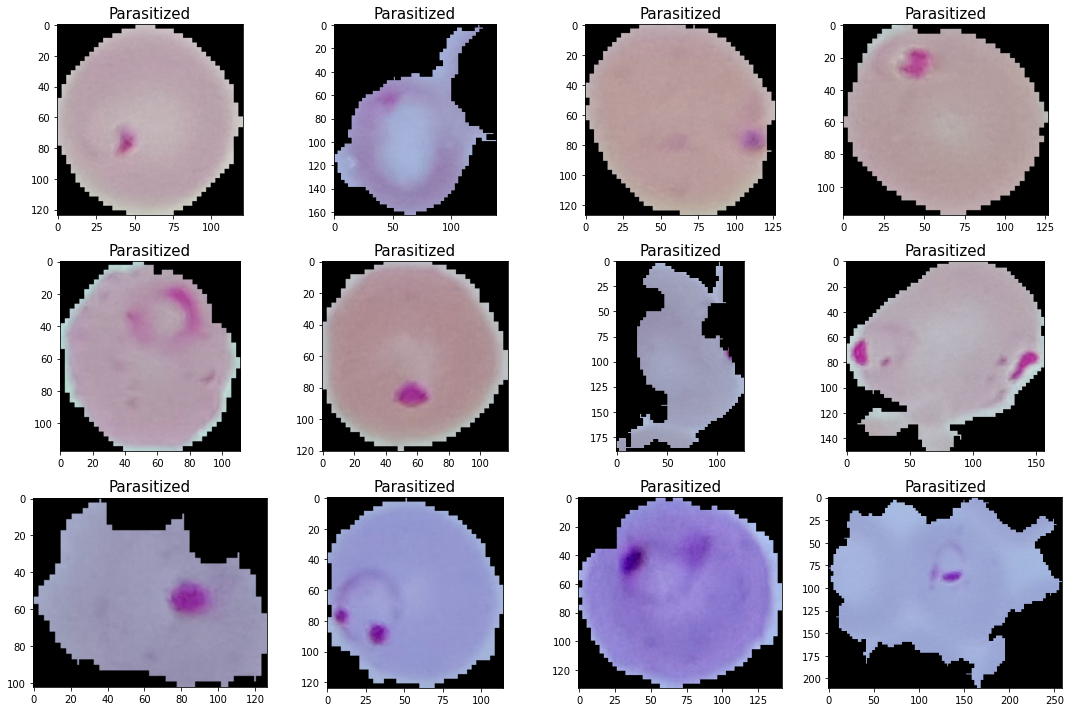

In [ ]:
plt.figure(figsize=(15,10),facecolor='white')  #Set canvas size
for i in range(12):
    plt.subplot(3,4,i+1)
    img = cv2.imread("/content/subset/train/Parasitized" + '/' + parasitized_train_data[i])
    plt.imshow(img)
    plt.title('Parasitized',fontsize=15)
plt.tight_layout()

#### 2.UNINFECTED DATA

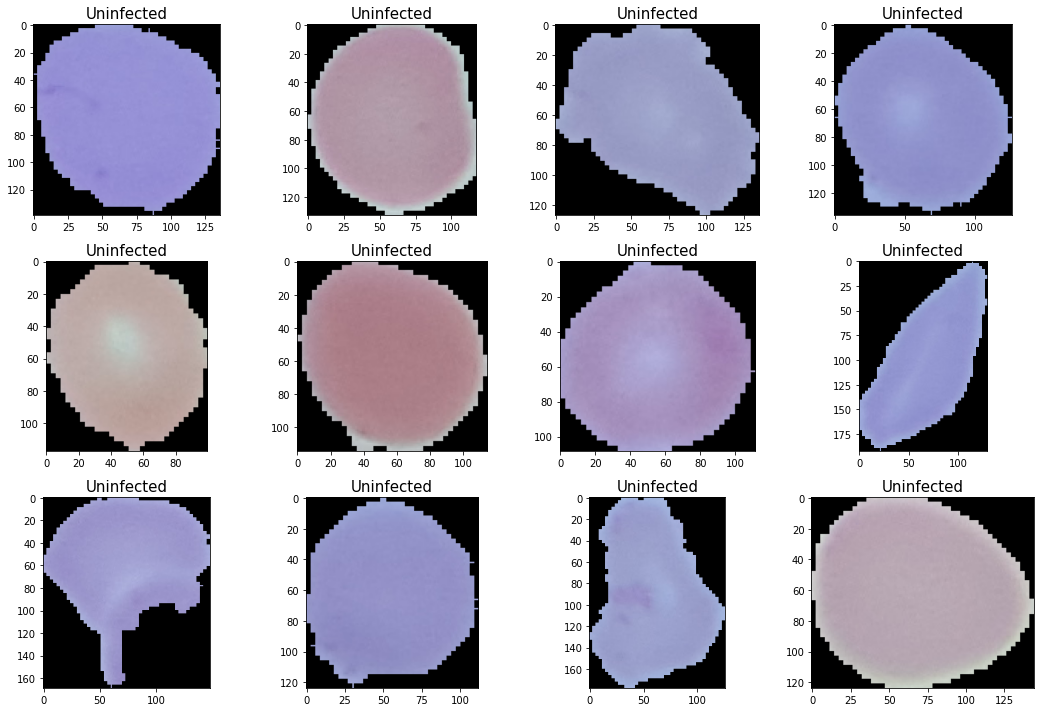

In [ ]:
plt.figure(figsize=(15,10),facecolor='white')
for j in range(12):
    plt.subplot(3,4,j+1)
    img = cv2.imread("/content/subset/train/Uninfected" + '/' + uninfected_train_data[j])
    plt.imshow(img)
    plt.title('Uninfected',fontsize=15)
plt.tight_layout()

#### BUILD VGG19 ARCHITECTURE

In [ ]:
# Define size of image
image_size = [224,224]

# Import Vgg16 library as shown and add preprocessing layer in front og vgg
vgg = VGG19(input_shape=image_size + [3], weights='imagenet', include_top=False) # Weights:- Imagenet data

80150528/80134624 [==============================] - 0s 0us/step


In [ ]:
# Dont train the existing weights
for layer in vgg.layers:
    layer.trainable = False

In [ ]:
# Getting the no of classes present in folder
folders = glob("/content/subset/train/*")
len(folders)

2

In [ ]:
# Adding more layer and create a object
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='sigmoid')(x)
model = Model(vgg.input,outputs=prediction)

In [ ]:
# Visualise the summary of model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

#### COMPILE MODEL

In [ ]:
model.compile(loss='binary_crossentropy',  # Use binary crossentropy because we have only two classes
              optimizer='adam',            
              metrics=['accuracy'])

#### TRAIN MODEL

In [ ]:
hist = model.fit_generator(training_set,
                           epochs=50,
                           validation_data=val_set,
                           steps_per_epoch=len(training_set),
                           validation_steps=len(val_set))

Epoch 1/50
345/345 [==============================] - 299s 829ms/step - loss: 0.4670 - accuracy: 0.7887 - val_loss: 0.3460 - val_accuracy: 0.8832
Epoch 2/50
345/345 [==============================] - 274s 794ms/step - loss: 0.3483 - accuracy: 0.8565 - val_loss: 0.3499 - val_accuracy: 0.8343
Epoch 3/50
345/345 [==============================] - 274s 792ms/step - loss: 0.3292 - accuracy: 0.8613 - val_loss: 0.2815 - val_accuracy: 0.8999
Epoch 4/50
345/345 [==============================] - 275s 797ms/step - loss: 0.3162 - accuracy: 0.8708 - val_loss: 0.3039 - val_accuracy: 0.8651
Epoch 5/50
345/345 [==============================] - 274s 793ms/step - loss: 0.3048 - accuracy: 0.8762 - val_loss: 0.3043 - val_accuracy: 0.8706
Epoch 6/50
345/345 [==============================] - 274s 793ms/step - loss: 0.2996 - accuracy: 0.8799 - val_loss: 0.3618 - val_accuracy: 0.8361
Epoch 7/50
345/345 [==============================] - 274s 793ms/step - loss: 0.2881 - accuracy: 0.8871 - val_loss: 0.3323 -

#### PLOTTING TRAINING & VALIDATION ACCURACY AS WELL AS LOSS & VALIDATION LOSS

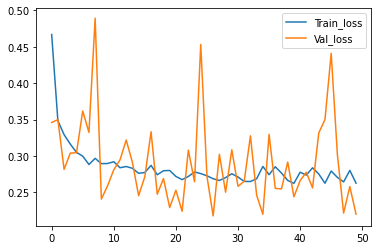

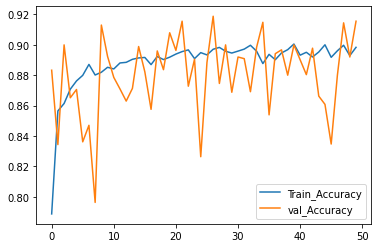

<Figure size 432x288 with 0 Axes>

In [ ]:
# Training loss and validation loss
plt.plot(hist.history['loss'], label='Train_loss')
plt.plot(hist.history['val_loss'], label='Val_loss')
plt.legend()
plt.show()
plt.savefig('Loss_valLoss')


# Training accuracy and validation accuracy
plt.plot(hist.history['accuracy'], label='Train_Accuracy')
plt.plot(hist.history['val_accuracy'], label='val_Accuracy')
plt.legend()
plt.show()
plt.savefig('Accuracy_ValAccuracy')

#### MODEL EVALUATION

In [ ]:
train_result = model.evaluate(training_set)
print("Train Accuracy & Loss:",train_result)

test_result = model.evaluate(test_set)
print("Testing Accuracy & Loss",test_result)

345/345 [==============================] - 267s 774ms/step - loss: 0.2547 - accuracy: 0.9057
Train Accuracy & Loss: [0.2546966075897217, 0.9057048559188843]
87/87 [==============================] - 15s 174ms/step - loss: 0.2106 - accuracy: 0.9217
Testing Accuracy & Loss [0.21056684851646423, 0.9217391014099121]


In [ ]:
# Create a dataframe
import pandas as pd
data = pd.DataFrame(zip(train_result,val_result), columns=['Train','Validation'],index=['Loss','Accuracy'])
data

,Train,Validation
Loss,0.254697,0.219875
Accuracy,0.905705,0.915518


#### MODEL SAVING

In [ ]:
# Saving model with the help of h5
model.save('VGG19_Model.h5')

#### PREDICTION ON TEST DATA

In [ ]:
y_prediction = model.predict(test_set)
y_prediction

array([[0.03828922, 0.9613545 ],
       [0.00864961, 0.99085706],
       [0.95763636, 0.04281236],
       ...,
       [0.4745898 , 0.5247733 ],
       [0.05146936, 0.9439444 ],
       [0.01104274, 0.98834723]], dtype=float32)

#### LOADING MODEL

In [ ]:
# Load Model
from tensorflow.keras.models import load_model
model = load_model('VGG19_Model.h5')

#### TEST IMAGES

In [ ]:
# Image path of test data
img = image.load_img('/content/subset/test/Uninfected/C104P65ThinF_IMG_20150918_171154_cell_152.png',target_size=(224,224))

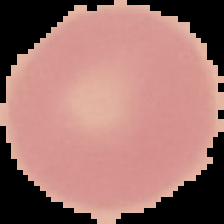

In [ ]:
# Visualise the image
img

In [ ]:
# Convert the image into array
from tensorflow.keras.preprocessing import image
array = image.img_to_array(img)
array

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [ ]:
# Getting the shape of image
array.shape

(224, 224, 3)

In [ ]:
# Scaling 
array = array/255

In [ ]:
# Expande the diamension of images
array = np.expand_dims(array, axis=0)
image_data = preprocess_input(array)

# Getting the shape
image_data.shape

(1, 224, 224, 3)

In [ ]:
# Prediction
model.predict(image_data)

array([[1.5043655e-37, 1.0000000e+00]], dtype=float32)

In [ ]:
# Final prediction 
img = np.argmax(model.predict(image_data), axis=1)
print('Prediction:',img)

if img == 0:
  print('Parasitized')
else:
  print('Uninfected')

Prediction: [1]
Uninfected


**Our Prediction Is Correct Here**

#### VISUALISE SOME TESTING IMAGES 

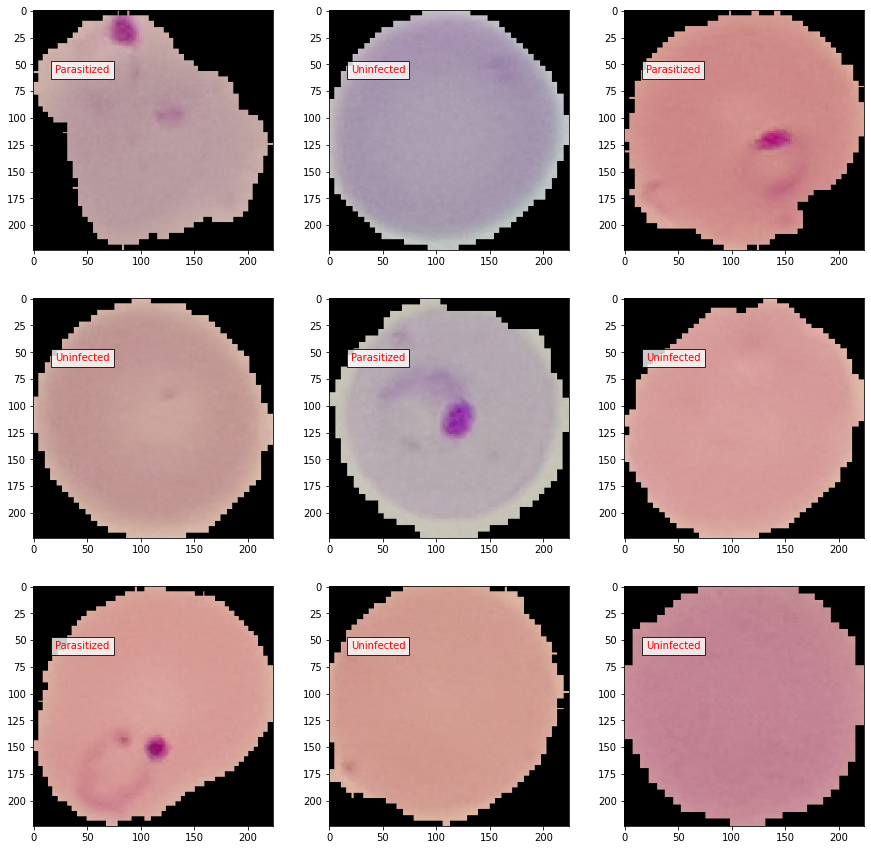

In [ ]:
# Visualise the prediction of the model
imgs, labels = next(test_set)
fig =plt.figure(figsize=(15,15))
columns = 3
rows = 3
class_names = ['Parasitized','Uninfected']
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    img_t = np.expand_dims(imgs[i],axis=0)
    prediction = model.predict(img_t)
    idx = prediction[0].tolist().index(max(prediction[0]))
    plt.text(20,58, class_names[idx],color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
    plt.imshow(imgs[i])
